In [1]:
import pandas as pd

In [2]:
import numpy as np

In [9]:
temperatures_demo=pd.read_csv("C:\\Users\\HP\\documents\\dev\\Machine-Learning-for-Time-Series-with-Python\\chapter2\\monthly_csv.csv")
temperatures_demo.head(5)

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [7]:
temperatures=pd.read_csv("C:\\Users\\HP\\documents\\dev\\Machine-Learning-for-Time-Series-with-Python\\chapter2\\monthly_csv.csv")
temperatures['Date']=pd.to_datetime(temperatures['Date'])
temperatures = temperatures.pivot(index='Date', columns='Source', values='Mean')

In [8]:
temperatures.head(5)


Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [12]:
from numpy import polyfit

def fit(X, y, degree=3):
    coef= polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X= [i%(365/4) for i in range(0, len(s))]
    seasonal =fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X=list(range(len(s)))
    trend=fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

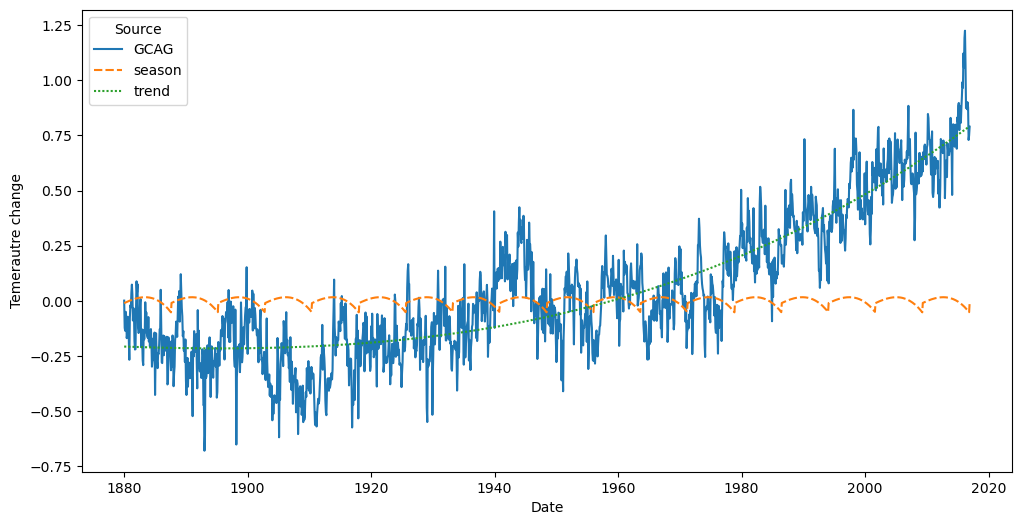

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

temperatures['trend'] = get_trend(temperatures['GCAG'])
temperatures['season'] = get_season(temperatures['GCAG']-temperatures['trend'])

sns.lineplot(data=temperatures[['GCAG','season','trend']])
plt.ylabel('Temerautre change');